In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
blue = pd.read_csv("train data insurance challenge.csv")

In [4]:
blue.head()

,outcome,categorical,numeric
0,0,3.0,41.0
1,0,1.0,41.0
2,0,3.0,44.0
3,0,3.0,NaN
4,0,NaN,40.0


In [5]:
# Check for missing value
total = blue.isnull().sum().sort_values(ascending=False)
percent = (blue.isnull().sum()/blue.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
categorical,5,0.025641
numeric,4,0.020513
outcome,0,0.000000


In [6]:
# fill in the missing value with the highest occuring number
blue['categorical'] = blue['categorical'].fillna(blue['categorical'].dropna().mode().values[0] )
blue['numeric'] = blue['numeric'].fillna(blue['numeric'].dropna().mode().values[0] )

In [8]:
# Rechecking if the missing values has be updated
total = blue.isnull().sum().sort_values(ascending=False)
percent = (blue.isnull().sum()/blue.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
numeric,0,0.0
categorical,0,0.0
outcome,0,0.0


In [9]:
blue.shape

(195, 3)

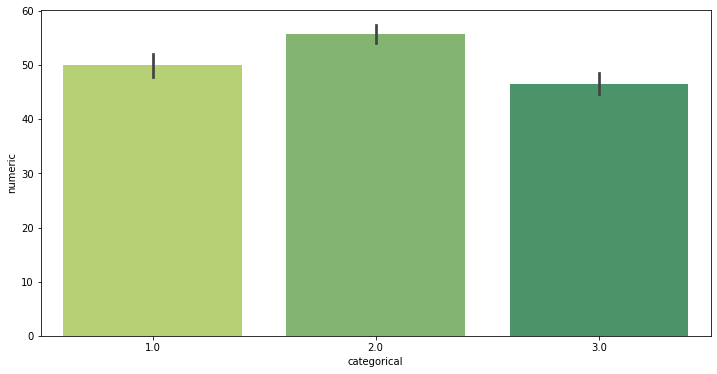

In [10]:
#Checking through Visualization categorical against numeric
plt.figure(figsize=(12,6))
sns.barplot(x = 'categorical',y='numeric', data =blue,palette='summer_r')
plt.show()

In [11]:
#Spliting into X(which is the independent variables) and y (which is the dependent variable) to be train and tested
x = blue[['categorical','numeric']]
y = blue['outcome']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
#Here the independent and dependent variable has be splited and 30% is assign to testing and the rest for training of the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=2)

In [33]:
model = LogisticRegression()

In [34]:
model.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
pred = model.predict(x_test)

In [36]:
model.score(x_test,y_test)

0.6271186440677966

In [44]:
len(y_train)

136

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[35  2  0  0  0]
 [16  2  0  0  0]
 [ 1  1  0  0  0]
 [ 1  0  0  0  0]
 [ 0  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.66      0.95      0.78        37
           1       0.33      0.11      0.17        18
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.63        59
   macro avg       0.20      0.21      0.19        59
weighted avg       0.52      0.63      0.54        59



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
blue2=pd.read_csv('test data  Insurance challenge.csv')

In [51]:
blue2

,categorical,numeric
0,NaN,71.0
1,3.0,75.0
2,NaN,71.0
3,1.0,NaN
4,2.0,73.0


In [55]:
blue2['categorical'] = blue2['categorical'].fillna(blue2['categorical'].dropna().mean() )
blue2['numeric'] = blue2['numeric'].fillna(blue2['numeric'].dropna().mode().values[0] )

In [56]:
blue2

,categorical,numeric
0,2.0,71.0
1,3.0,75.0
2,2.0,71.0
3,1.0,71.0
4,2.0,73.0


In [58]:
outcome= model.predict(blue2)

In [59]:
blue2['outcome']= outcome

In [60]:
blue2

,categorical,numeric,outcome
0,2.0,71.0,1
1,3.0,75.0,1
2,2.0,71.0,1
3,1.0,71.0,1
4,2.0,73.0,1


In [61]:
import statsmodels.api as sm

In [62]:
exog,endog = sm.add_constant(x),y

In [63]:
mod = sm.GLM(endog,exog,family=sm.families.Poisson(link=sm.families.links.log))

<ipython-input-63-826f6524f570>:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  mod = sm.GLM(endog,exog,family=sm.families.Poisson(link=sm.families.links.log))


In [64]:
res= mod.fit()

In [80]:
display(res.summary())
y_pred = res.predict(exog)



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                outcome   No. Observations:                  195
Model:                            GLM   Df Residuals:                      192
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -180.97
Date:                Sat, 27 Mar 2021   Deviance:                       196.10
Time:                        15:04:23   Pearson chi2:                     219.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.1460      0.766     -8.026      0.000      -7.647      -4.645
categorical     0.1625      0.175      0.931      0.352      -0.180       0.505
numeric         0.0950      0.011      8.791      0.000       0.074       0.116
===============================================================================
"""

In [81]:
y_pred

0      0.171510
1      0.123911
2      0.228071
3      0.784255
4      0.132568
         ...   
190    2.084463
191    0.666604
192    2.520666
193    2.520666
194    0.886440
Length: 195, dtype: float64

In [82]:
 res.predict(blue2)

0      0.518566
1      0.002128
2      0.518566
3    242.084775
4      0.717767
dtype: float64